In [151]:
with open("intialize.py") as f:
    exec(f.read())

In [152]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,81395,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,89652,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,64254,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,23898,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,77403,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [153]:
df.shape
half_index = (10000-len(df) // 5)
df = df.drop(df.index[:half_index])


In [154]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

No Null :party:

In [155]:
df.nunique()

squareMeters         1974
numberOfRooms         100
hasYard                 2
hasPool                 2
floors                100
cityCode             1978
cityPartRange          10
numPrevOwners          10
made                   32
isNewBuilt              2
hasStormProtector       2
basement             1827
attic                1825
garage                806
hasStorageRoom          2
hasGuestRoom           11
price                2000
dtype: int64

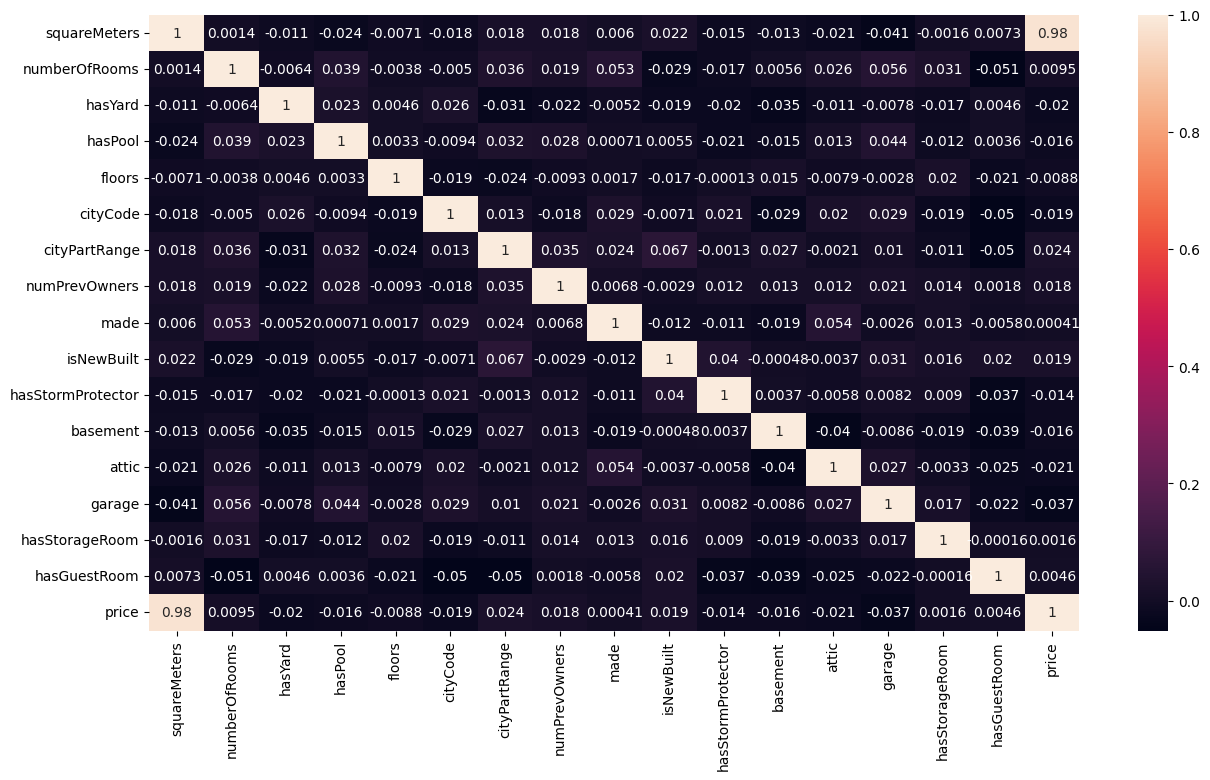

In [156]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True);

In [157]:
X = df[['squareMeters','numberOfRooms','floors','made','basement','attic','garage','hasPool','hasYard','isNewBuilt']]
y = df['price']
scaler = MinMaxScaler()
X[['squareMeters','numberOfRooms','floors','made','basement','attic','garage']] = scaler.fit_transform(X[['squareMeters','numberOfRooms','floors','made','basement','attic','garage']])

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)


In [158]:
lr = LinearRegression(fit_intercept=True)
forest = RandomForestRegressor(n_estimators=150,max_depth=14)

lr.fit(X_train,y_train)
forest.fit(X_train,y_train)


y_pred_lr = lr.predict(X_test)
y_pred_forest = forest.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
mse_lr = mean_squared_error(y_test,y_pred_lr)
r2_forest = r2_score( y_test,y_pred_forest)
r2_lr = r2_score(y_test, y_pred_lr)

print("Random Forest Result :")
print(f"Mean Squared Error : {mse_forest}")
print(f"R2 Score : {r2_forest}")
print("Linear Regression Result :")
print(f"Mean Squared Error : {mse_lr}")
print(f"R2 Score : {r2_lr}")


Random Forest Result :
Mean Squared Error : 0.004085510657031127
R2 Score : 0.9508954246095456
Linear Regression Result :
Mean Squared Error : 0.003867790324215649
R2 Score : 0.9535122491375573


In [159]:
import joblib
joblib.dump(lr, 'forest.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(scaler_y, 'scalery.pkl')

['scalery.pkl']

In [160]:
print('\nMinimum Values:')
print(df.min())

print('\nMaximum Values:')
print(df.max())


Minimum Values:
squareMeters         -8214.0
numberOfRooms            1.0
hasYard                  0.0
hasPool                  0.0
floors                   1.0
cityCode                13.0
cityPartRange            1.0
numPrevOwners            1.0
made                  1990.0
isNewBuilt               0.0
hasStormProtector        0.0
basement                 4.0
attic                    7.0
garage                 100.0
hasStorageRoom           0.0
hasGuestRoom             0.0
price                22499.2
dtype: float64

Maximum Values:
squareMeters           108525.0
numberOfRooms             100.0
hasYard                     1.0
hasPool                     1.0
floors                    100.0
cityCode                99905.0
cityPartRange              10.0
numPrevOwners              10.0
made                     2021.0
isNewBuilt                  1.0
hasStormProtector           1.0
basement                10000.0
attic                    9990.0
garage                   1000.0
hasStorage